# Data Analysis of Bank of England/NMG Household Survey Data
# by Melih Ekinci

Data Source:			2011-2021 NMG Research Surveys
<br>Link:https://www.bankofengland.co.uk/statistics/research-datasets
													
Sample of survey:<br>
            2011-	995 households						
			2012-	4003 households							
			2013-	6006 households							
			2014-	6001 households								
			2015-	6007 households								
			2016-	6011 households								
			2017-	6018 households								
			2018-	6000 households							
			2019-	6051 households								
			2020-	6032 households								
			2021-	6051 households							
													
Survey period:<br>		2011-	23-29 September 2011										
		2012-	12 September - 3 October 2012										
		2013-	12-30 September 2013										
		2014-	3-24 September 2014										
		2015-	2-22 September 2015										
		2016-	31 August-19 September 2016										
		2017-	6-26 September 2017										
		2018-	5-26 September 2018										
		2019-	4-24 September 2019										
		2020-	25 August-15 September 2020										
		2021-	1-21 September 2021										
												

## 1. Data Preparation

In order to prepare a dataset of UK household income survey combined across several years, necessary libraries and excel file must be imported firstly. After importing the excel file, each sheet must assigned to a dataframe. Lastly, we will concat these dataframes into together to have a single dataframe contanining data for the years between 2011-2021.

### 1.1 Importing data

Below, I imported the libraries that is needed in this work.

In [1]:
#importing necessary libraries
#pip install missingno
#pip install matplotlib
#pip install ggplot==0.4.7
import pandas as pd
import numpy as np
import itertools
#import missingno as msno
import matplotlib.pyplot as plt
import os
import warnings

import seaborn as sns
warnings.filterwarnings("ignore")

Changing the working directory to the file folder of choice.

In [3]:
#Changing working directory to a designated file
os.chdir(r"/Users/melihekinci/Documents/BoE")
print("Directory changed")

Directory changed


Importing the excel file and listing sheet names.

In [4]:
#reading the data
xlsx = pd.ExcelFile('boe-nmg-household-survey-data.xlsx')

In [5]:
#listing sheet names in the data
SheetList=xlsx.sheet_names
SheetList

['Instructions',
 'Data description',
 '2011-2021 PID-SUBSID',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021']

Next, data frames for each sheet is created using a dictionary.

In [6]:
SheetDictionary={}
#creating datasets for each sheet using dictionary
for i in range(len(SheetList)):
    SheetDictionary[SheetList[i]]=xlsx.parse(i)

In [7]:
#getting sheet names into a list.
keys=list(SheetDictionary.keys())

Let's add a column indicating the year of survey, also look at the number of features for each year. It is important to see whether each data frame has the same features and same number of features. Furthermore, names of these features should be written same in order to concatenate datasets properly. So, for the next step I'll check two things: <br>
1) Number of features <br>
2) Whether feature names are same across datasets

In [8]:
#adding a column indicating the year of survey for each data set
for i in range(keys.index('2011'),len(keys)):
    SheetDictionary[keys[i]]["year"]=int(keys[i])
    print('For the year '+ str(keys[i]) +', number of features is '+ str(len(SheetDictionary[keys[i]].columns))+'.')

For the year 2011, number of features is 1423.
For the year 2012, number of features is 1423.
For the year 2013, number of features is 1423.
For the year 2014, number of features is 1423.
For the year 2015, number of features is 1423.
For the year 2016, number of features is 1423.
For the year 2017, number of features is 1423.
For the year 2018, number of features is 1423.
For the year 2019, number of features is 1423.
For the year 2020, number of features is 1423.
For the year 2021, number of features is 1923.


So the number of features is different for the year 2021. Let's check whether the features are same for the years 2011-2020. We know that their number of features are same. My next step will be getting all feature names in a dataset so I can compare them. It's really important to **strip** and **lower case** features name before comparing them.

In [9]:
column_names= pd.DataFrame()
for i in range(keys.index('2011'),len(keys)):
    if keys[i]!='2021':
        column_names[keys[i]]=list(SheetDictionary[keys[i]].rename(str.lower, axis='columns').columns.str.strip())
    else:
        column_names[keys[i]]=pd.Series(list(SheetDictionary[keys[i]].rename(str.lower, axis='columns').columns.str.strip()))

In [10]:
column_names.head()

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,we_factor,we_factor,we_factor,we_factor,we_factor,we_factor,we_factor,we_factor,we_factor,we_factor,we_factor
1,subsid,subsid,subsid,subsid,subsid,subsid,subsid,subsid,subsid,subsid,subsid
2,dsoc,dsoc,dsoc,dsoc,dsoc,dsoc,dsoc,dsoc,dsoc,dsoc,dsoc
3,dsocial,dsocial,dsocial,dsocial,dsocial,dsocial,dsocial,dsocial,dsocial,dsocial,dsocial
4,fgenage_1,fgenage_1,fgenage_1,fgenage_1,fgenage_1,fgenage_1,fgenage_1,fgenage_1,fgenage_1,fgenage_1,fgenage_1


Here I created a column based a condition to test whether all values are equal across 2011-2021. If any feature name is different in any year given a row, the column (Test1) will show 1 as a result.

In [11]:
column_names['Test1'] = column_names.apply(lambda x: 0 if x['2011'] ==
                     x['2012'] and x['2011'] ==x['2013'] and x['2011'] ==x['2014'] and x['2011'] ==x['2015'] and x['2011'] ==x['2016'] and x['2011'] ==x['2017'] and x['2011'] ==x['2018']
                    and x['2011'] ==x['2019'] and x['2011'] ==x['2020'] else 1, axis=1)

In [12]:
column_names.head()

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,Test1
0,we_factor,we_factor,we_factor,we_factor,we_factor,we_factor,we_factor,we_factor,we_factor,we_factor,we_factor,0
1,subsid,subsid,subsid,subsid,subsid,subsid,subsid,subsid,subsid,subsid,subsid,0
2,dsoc,dsoc,dsoc,dsoc,dsoc,dsoc,dsoc,dsoc,dsoc,dsoc,dsoc,0
3,dsocial,dsocial,dsocial,dsocial,dsocial,dsocial,dsocial,dsocial,dsocial,dsocial,dsocial,0
4,fgenage_1,fgenage_1,fgenage_1,fgenage_1,fgenage_1,fgenage_1,fgenage_1,fgenage_1,fgenage_1,fgenage_1,fgenage_1,0


In [13]:
print("Unique values for the test column: "+str(column_names.Test1.unique()))
print("Therefore, all of the 1423 features across the datasets belonging the years 2011-2020 are the same features.")

Unique values for the test column: [0]
Therefore, all of the 1423 features across the datasets belonging the years 2011-2020 are the same features.


### 1.2 Merging dataframes

So, we know that feature names and number are same for the years 2011-2020. For the year 2021, there might be additional features. In order to concatenate these datasets into one single dataset, we can use pd.concat function to match features accordingly. **It's important to keep feature names stripped and lower cased.**

In [14]:
#merging all data sets across years
df_merged=SheetDictionary[keys[keys.index('2011')]].rename(str.lower, axis='columns').rename(str.strip, axis='columns')
for i in range(keys.index('2012'),len(keys)):
    df_merged=pd.concat([df_merged, SheetDictionary[keys[i]].rename(str.lower, axis='columns').rename(str.strip, axis='columns')],axis=0, ignore_index=True)

In [15]:
#the final dataset to be cleansed/analyzed is ready.
df_merged.head()

,we_factor,subsid,dsoc,dsocial,fgenage_1,dage,dregion,fgen,qhousing,dhousing,...,cv12b_4,cv12b_5,cv12b_97,cv12c_1,cv12c_2,cv12c_3,cv12c_4,cv12c_97,ret2021sep,mh04
0,1.176425,22007620.0,2.0,1.0,23,1,3,2,4,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.931040,22238715.0,5.0,5.0,22,1,3,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.181808,20404925.0,2.0,1.0,59,5,3,1,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.000213,21839916.0,5.0,5.0,21,1,9,1,3,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.913671,23091998.0,4.0,4.0,24,1,1,2,4,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59175 entries, 0 to 59174
Columns: 1924 entries, we_factor to mh04
dtypes: float64(1898), int64(23), object(3)
memory usage: 868.6+ MB


In [17]:
df_merged.year.unique()

array([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])

### 1.3 Data Quality

Since we merged datasets properly, we can now try to understand quality of this dataset. For example, looking at missing value ratios for each column can be intuitive.

Below, I created a dataframe which has the features in dataset as index. Number of missing values and its ratio to total number of observations is listed.

In [18]:
null=df_merged.isnull().sum().sort_values(ascending = False)

In [19]:
df_null = pd.DataFrame(data=null, columns=['null_number'])

In [20]:
df_null["null_ratio"]=df_null["null_number"]/59175*100

In [21]:
df_null.head()

,null_number,null_ratio
boe87free_ps_6,59175,100.0
be2ab_4,59175,100.0
be2ab_6,59175,100.0
be2ab_7,59175,100.0
be2ab_8,59175,100.0


Also, I will look at number of features which has 0 missing values. There are only 24 features out of 1924 columns which has no missing observation.

In [22]:
df_null[df_null.null_ratio==0]

,null_number,null_ratio
year,0,0.0
fgenage_1,0,0.0
dage,0,0.0
fgen,0,0.0
qhousing,0,0.0
dhousing,0,0.0
be13,0,0.0
dregion,0,0.0
be2a,0,0.0
qbe15_97,0,0.0


I will drop all features that have no observations in it.

In [23]:
df_merged2=df_merged[df_null[df_null.null_ratio!=100].index]
df_merged2.head()

,be10b_hidden,boe87incomev2_13,boe87_bandsv1v2_13,boe87_bandsv1v2_7,boe87incomev2_7,boe87incomev2_3,boe87_bandsv1v2_3,boe87incomev2_12,boe87incomev2_99,boe87_bandsv1v2_12,...,qbe15_6,qbe15_7,qregion,qbe15_8,qbe15_11,qbe15_9,qbe15_10,qbe15_96,fbe03,we_factor
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,4,0,0,1,0,0,1,1.176425
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,5,0,0,0,0,0,1,0.931040
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,5,0,0,0,0,0,1,1.181808
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,11,0,0,0,0,0,1,1.000213
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,1,0,0,0,0,0,1,0.913671


We have left with 1461 features, now we can focus on the features that is topic of analysis: household income and other 4-5 variables. <br> Features related to household income are qincome,qincome_v1,qincome_v2,qincome_free,qincomefree_v2. Let's check how these features evolve across years.

As there are several variables related to income in data, I wanted to check all variables to see whether we can use them across 2011-2021 meaningfully.

In [24]:
df_merged2["qincomefreev2_calc"]=df_merged2["qincomefreev2_n_1"]+df_merged2["qincomefreev2_n_2"]+df_merged2["qincomefreev2_n_3"]

In [25]:
#var_income=list(df_merged2.columns[df_merged2.columns.str.contains("income")])
var_income=["qincome","qincomev1","qincomev2_1_1","qincomefree_1","qincomefreev2_n_1","qincomefreev2_n_2","qincomefreev2_n_3","qincomefreev2_calc","hincomev2_1","hincomev2_2","hincomev2_3","incomev2comb","combincome"]
var_income.append("year")
var_income.sort()

In [26]:
df_merged2[var_income].groupby(by="year").mean()

,combincome,hincomev2_1,hincomev2_2,hincomev2_3,incomev2comb,qincome,qincomefree_1,qincomefreev2_calc,qincomefreev2_n_1,qincomefreev2_n_2,qincomefreev2_n_3,qincomev1,qincomev2_1_1
year,,,,,,,,,,,,,
2011,NaN,NaN,NaN,NaN,NaN,16.504523,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012,NaN,NaN,NaN,NaN,NaN,16.782913,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,NaN,NaN,NaN,NaN,NaN,16.729271,41376.935119,NaN,NaN,NaN,NaN,NaN,NaN
2014,NaN,NaN,NaN,NaN,NaN,17.821030,36633.515647,NaN,NaN,NaN,NaN,NaN,NaN
2015,NaN,10.050400,9.552790,8.876136,12.697602,NaN,37111.741182,53395.743073,21564.103796,18476.158967,17233.613636,11.233227,11.371859
2016,NaN,9.969889,9.525644,8.803180,12.590584,NaN,NaN,56333.778607,22104.384303,19046.750259,15658.438497,NaN,11.036284
2017,671.520398,9.781987,9.746865,8.956474,12.559987,NaN,NaN,58039.706349,22074.775710,20146.470852,15748.132300,NaN,10.819923
2018,731.733399,10.095000,9.914708,8.957284,12.794500,NaN,NaN,62129.710875,24716.298452,21429.505104,16377.762530,NaN,11.023328
2019,722.720517,10.098000,9.779473,8.884615,12.773591,NaN,NaN,61527.681046,37282.195140,21684.883894,15106.296610,NaN,10.753562


For the year 2011 and 2012, there is only categorical income feature available for analysis. For other years, there are  both categorical and continuous features related to income. For comparison between 2011 and 2021, I have to use categorical ones. I will use 2015 and afterwards to see trend of household income.

Now, I want to look at availability of social variables such as working status, age group, gender and marital status across years.

In [27]:
df_merged2[["dage","fgen","qmarital","workingstatus","a20workingstatus","qworking","dworking","a20dworking","dhousing","year"]].groupby(by="year").mean()

,dage,fgen,qmarital,workingstatus,a20workingstatus,qworking,dworking,a20dworking,dhousing
year,,,,,,,,,
2011,3.676382,1.545729,2.093467,NaN,NaN,5.068342,1.454271,NaN,3.450251
2012,3.706970,1.515613,2.362728,NaN,NaN,5.162878,1.438171,NaN,3.592805
2013,3.704296,1.509158,2.308358,NaN,NaN,5.192141,1.438561,NaN,4.035798
2014,3.816531,1.486086,NaN,3.491918,NaN,NaN,1.443426,NaN,2.925846
2015,3.738472,1.507907,NaN,3.323955,NaN,NaN,1.412519,NaN,3.178791
2016,3.811180,1.505240,NaN,3.348361,NaN,NaN,1.412577,NaN,3.199301
2017,3.807245,1.537554,NaN,3.555334,NaN,NaN,1.447657,NaN,2.906115
2018,3.884833,1.532167,NaN,3.314167,NaN,NaN,1.399167,NaN,2.751000
2019,4.027764,1.514295,NaN,3.483556,NaN,NaN,1.437118,NaN,2.783507


I want to look at savings of these individuals, too.

In [28]:
var_saving=list(df_merged2.columns[df_merged2.columns.str.contains("be2a")])
var_saving.append("year")
df_merged2[var_saving].groupby(by="year").mean()

,be2a_hidden,be2afree_1,be2afree_dk_1,be2afree_dk_2,be2a
year,,,,,
2011,NaN,NaN,NaN,NaN,11.162814
2012,NaN,NaN,NaN,NaN,10.191856
2013,1.282317,810.491196,0.180997,0.072563,13.692807
2014,NaN,862.085217,0.215631,0.113648,18.122480
2015,NaN,1223.641988,0.224738,0.132179,19.006825
2016,NaN,1713.429094,0.245051,0.163700,20.104475
2017,NaN,2523.003298,0.237288,0.158026,17.988202
2018,NaN,1756.278768,0.303167,0.145000,20.039167
2019,NaN,1199.499859,0.274996,0.139151,20.083292


In [29]:
df_merged2[["be24","boe60a","boe62a","year","boe55","boe65b","mq08"]].groupby(by="year").mean()

,be24,boe60a,boe62a,boe55,boe65b,mq08
year,,,,,,
2011,11.141709,NaN,NaN,NaN,NaN,NaN
2012,9.760180,NaN,NaN,NaN,NaN,NaN
2013,9.399267,NaN,NaN,NaN,NaN,NaN
2014,NaN,NaN,NaN,2.269288,19.552741,NaN
2015,NaN,1.933743,1.758876,2.108041,18.005161,3.292992
2016,NaN,1.980467,1.731013,2.266345,19.129263,3.581933
2017,NaN,1.992220,1.681431,2.138252,17.741609,3.756065
2018,NaN,2.022379,1.758373,2.143167,17.777333,3.739333
2019,NaN,1.970270,1.779352,2.140142,17.159313,3.974219


In [30]:
#Columns that has missing value ratio lower than 30%
df_merged3=df_merged[df_null[df_null.null_ratio<30].index]
df_merged3.columns

Index(['be13b_1_1', 'be13b_1_2', 'boe65bfree_dk_1', 'boe65bfree_dk_2',
       'boe65b', 'fq02', 'fq01', 'mq07', 'mq06', 'mq04', 'otheradults', 'mq01',
       'mq02', 'mq08', 'mq03', 'typeresponse_1', 'qbe22b', 'subsid',
       'dworking', 'be43', 'boe39', 'boe55', 'bod55', 'boe39a_2', 'boe39a_3',
       'nochildren', 'boe39a_1', 'boe65afree_dk_1', 'boe65a',
       'boe65afree_dk_2', 'be2afree_dk_1', 'be2afree_dk_2', 'be31e', 'qual',
       'be31g', 'year', 'fgenage_1', 'dage', 'fgen', 'qhousing', 'dhousing',
       'be13', 'dregion', 'be2a', 'qbe15_97', 'qbe15_3', 'be23', 'qbe15_4',
       'qbe15_5', 'qbe15_6', 'qbe15_7', 'qregion', 'qbe15_8', 'qbe15_11',
       'qbe15_9', 'qbe15_10', 'qbe15_96', 'fbe03', 'we_factor'],
      dtype='object')

## 2. Data Analysis

I will choose categorical and continuous income variables, age,housing, monthly savings and expectations over economy to analyze in this work.

Since income brackets are different for 2011, I will make 2 graphs looking at distributions separately.

In [48]:
# Created a new variable maps explanation of values using data description.
df_merged2["qincome_mapped"]=df_merged2["qincome"].map({
    1: 'Up to £4,499',
    2: '£4,500 - £6,499',
    3:'£6,500 - £7,499',
    4:'£7,500 - £9,499',
    5:'£9,500 - £11,499',
    6:'£11,500 - £13,499',
    7:'£13,500 - £15,499',
    8:'£15,500 - £17,499',
    9:'£17,500 - £24,999',
    10:'£25,000 - £29,999',
    11:'£30,000 - £39,999',
    12:'£40,000 - £49,999',
    13:'£50,000 - £74,999',
    14:'£75,000 - £99,999',
    15:'£100,000 or more',
    97:'Unknown/Prefer Not to State',
    96:'Unknown/Prefer Not to State'})

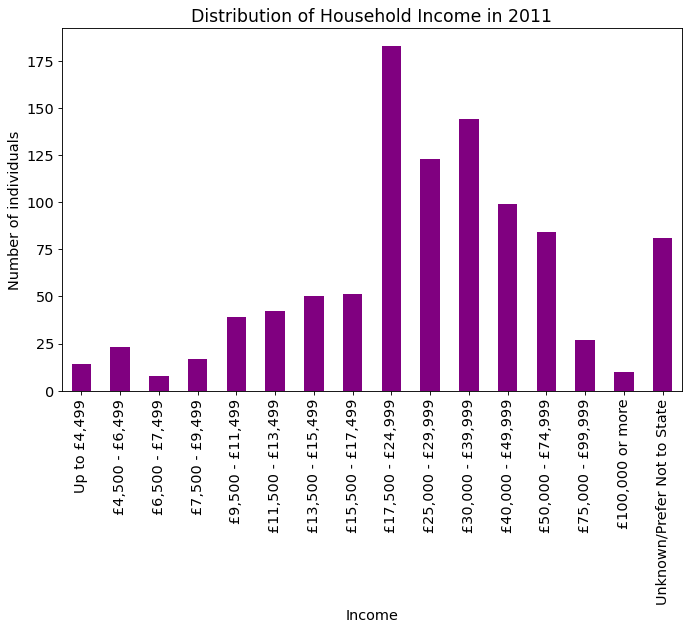

In [154]:
#df_merged2[df_merged2.year==2011]["qincome_mapped"].hist(alpha=0.5)
plt.rcParams.update({'font.size': 13})
income_category=['Up to £4,499',
                 '£4,500 - £6,499',
                 '£6,500 - £7,499',
                 '£7,500 - £9,499',
                 '£9,500 - £11,499',
    '£11,500 - £13,499',
    '£13,500 - £15,499',
    '£15,500 - £17,499',
    '£17,500 - £24,999',
    '£25,000 - £29,999',
    '£30,000 - £39,999',
    '£40,000 - £49,999',
    '£50,000 - £74,999',
    '£75,000 - £99,999',
    '£100,000 or more',
    'Unknown/Prefer Not to State']
fig = plt.figure(figsize=(10, 6), dpi=80)
df_merged2[df_merged2.year==2011]["qincome_mapped"].value_counts().reindex(income_category).plot(kind='bar',color="purple")
plt.xticks(rotation='vertical')
plt.xlabel("Income")
plt.ylabel("Number of individuals")
plt.title('Distribution of Household Income in 2011')
plt.show()

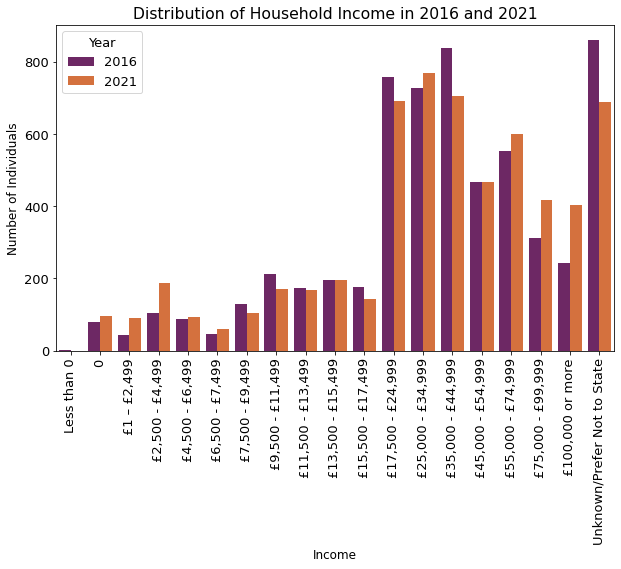

In [146]:
#Looking at distributions for 2016 and 2021.
order=['Less than 0',
    '0',
    '£1 – £2,499',
    '£2,500 - £4,499',
    '£4,500 - £6,499',
    '£6,500 - £7,499',
    '£7,500 - £9,499',
    '£9,500 - £11,499',
    '£11,500 - £13,499',
    '£13,500 - £15,499',
    '£15,500 - £17,499',
    '£17,500 - £24,999',
    '£25,000 - £34,999',
    '£35,000 - £44,999',
    '£45,000 - £54,999',
    '£55,000 - £74,999',
    '£75,000 - £99,999',
    '£100,000 or more',
    'Unknown/Prefer Not to State']
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.countplot(x="incomev2comb_mapped", hue="year", data=df_merged2[(df_merged2.year==2016) | (df_merged2.year==2021)], order=order,palette='inferno')
plt.xticks(rotation='vertical')
ax.set_xlabel("Income", fontsize = 12)
ax.set_ylabel("Number of Individuals", fontsize = 12)
plt.legend(title='Year',loc='upper left')
plt.title("Distribution of Household Income in 2016 and 2021")
plt.show()

It can be said that distribution of income generally stays the same between the years 2016 and 2021. However, there is a noticable increase in right tail of the distribution, indicating that percentage of income group > 75,00 sterlin increased more compared to other income groups.

Now, let's see trend of average the household income between the years 2015-2021.

In [53]:
df_merged2[df_merged2.year>2014][["qincomefreev2_calc","year"]].groupby(by="year").mean()

,qincomefreev2_calc
year,
2015,53395.743073
2016,56333.778607
2017,58039.706349
2018,62129.710875
2019,61527.681046
2020,57151.862697
2021,60037.401124


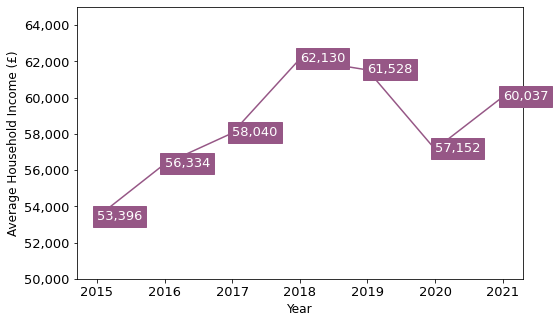

In [170]:
data=df_merged2[df_merged2.year>2014][["qincomefreev2_calc","year"]].groupby(by="year").mean()
fig, ax = plt.subplots(figsize=(8, 5))
sns.lineplot(data=data, x="year", y="qincomefreev2_calc",marker='*',color='#965786')
ax.set_ylim(50000, 65000)
ax.set_xlabel("Year", fontsize = 12)
ax.set_ylabel("Average Household Income (£)", fontsize = 12)
ylabels = ['{:,.0f}'.format(x) for x in ax.get_yticks()]
ax.set_yticklabels(ylabels)
# label points on the plot
for x, y in zip(data.index, data['qincomefreev2_calc']):
 # the position of the data label relative to the data point can be adjusted by adding/subtracting a value from the x &/ y coordinates
 plt.text(x = x, # x-coordinate position of data label
 y = y-150, # y-coordinate position of data label, adjusted to be 150 below the data point
 s = '{:,.0f}'.format(y), # data label, formatted to ignore decimals
 color = 'white').set_backgroundcolor("#965786") # set colour of line


plt.show()

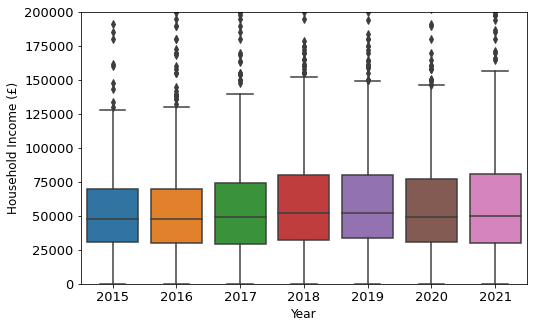

In [162]:
fig, ax = plt.subplots(figsize=(8, 5))
data2=df_merged2[df_merged2.year>2014]
ax = sns.boxplot(x="year", y="qincomefreev2_calc", data=data2)
ax.set_xlabel("Year", fontsize = 12)
ax.set_ylabel("Household Income (£)", fontsize = 12)
ax.set_ylim(0, 200000)
plt.show()

In [31]:
df_merged2[(df_merged2.year==2015) &  (df_merged2.qincomefreev2_calc!=np.nan)].qincomefreev2_calc.describe()

count       397.000000
mean      53395.743073
std       32834.209872
min           0.000000
25%       31000.000000
50%       48000.000000
75%       70000.000000
max      191000.000000
Name: qincomefreev2_calc, dtype: float64

In [49]:
df_merged2[(df_merged2.year==2020) &  (df_merged2.qincomefreev2_calc>=0)].qincomefreev2_calc

47094    44500.0
47096    45000.0
47110     7400.0
47118    48000.0
47124    74000.0
          ...   
53076    80000.0
53083    81000.0
53090    18000.0
53102    45000.0
53107    30000.0
Name: qincomefreev2_calc, Length: 823, dtype: float64

In [176]:
df_merged2[(df_merged2.year==2016) &  (df_merged2.qincomefreev2_calc!=np.nan) ].qincomefreev2_calc.describe()

count       804.000000
mean      56333.778607
std       47331.817307
min           0.000000
25%       30000.000000
50%       48000.000000
75%       70000.000000
max      700000.000000
Name: qincomefreev2_calc, dtype: float64

In [165]:
df_merged2[(df_merged2.year==2017) &  (df_merged2.qincomefreev2_calc!=np.nan)].qincomefreev2_calc.describe()

count       756.000000
mean      58039.706349
std       46972.137792
min           0.000000
25%       29416.250000
50%       49000.000000
75%       74461.000000
max      320000.000000
Name: qincomefreev2_calc, dtype: float64

In [166]:
df_merged2[(df_merged2.year==2018) &  (df_merged2.qincomefreev2_calc!=np.nan)].qincomefreev2_calc.describe()

count       754.000000
mean      62129.710875
std       47638.349263
min           0.000000
25%       32000.000000
50%       52100.000000
75%       80000.000000
max      400000.000000
Name: qincomefreev2_calc, dtype: float64

In [167]:
df_merged2[(df_merged2.year==2019) &  (df_merged2.qincomefreev2_calc!=np.nan)].qincomefreev2_calc.describe()

count       765.000000
mean      61527.681046
std       39330.352114
min           0.000000
25%       34000.000000
50%       52000.000000
75%       80000.000000
max      260000.000000
Name: qincomefreev2_calc, dtype: float64

In [168]:
df_merged2[(df_merged2.year==2020) &  (df_merged2.qincomefreev2_calc!=np.nan)].qincomefreev2_calc.describe()

count       823.000000
mean      57151.862697
std       37590.332788
min           0.000000
25%       31000.000000
50%       49514.000000
75%       77000.000000
max      280000.000000
Name: qincomefreev2_calc, dtype: float64

In [169]:
df_merged2[(df_merged2.year==2021) &  (df_merged2.qincomefreev2_calc!=np.nan)].qincomefreev2_calc.describe()

count       890.000000
mean      60037.401124
std       44155.506482
min           0.000000
25%       30000.000000
50%       50000.000000
75%       81000.000000
max      300000.000000
Name: qincomefreev2_calc, dtype: float64

Let's look at this trend in terms of age group.

In [135]:
#mapping age groups into a variable
df_merged2["dage_mapped"]=df_merged2["dage"].map({
    1: '18-24',
    2: '25-34',
    3: '35-44',
    4: '45-54',
    5: '55-64',
    6: '65+'})

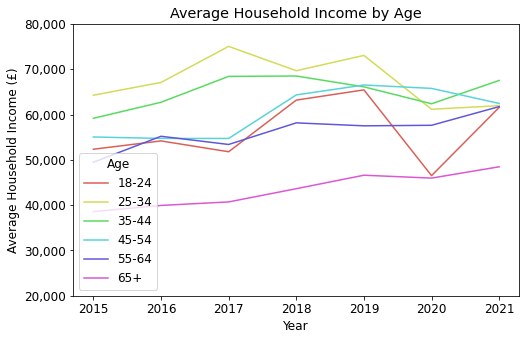

In [56]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_xlabel("Year", fontsize = 12)
ax.set_ylabel("Average Household Income (£)", fontsize = 12)
palette = sns.color_palette("hls", 6)
sns.lineplot(data=df_merged2[df_merged2.year>2014][["qincomefreev2_calc","year","dage_mapped"]].groupby(["year","dage_mapped"]).mean(), x="year", y="qincomefreev2_calc",hue="dage_mapped",palette=palette)
ax.set_ylim(20000, 80000)
ylabels = ['{:,.0f}'.format(x) for x in ax.get_yticks()]
ax.set_yticklabels(ylabels)
plt.legend(title='Age',loc='lower left')
plt.title("Average Household Income by Age")
plt.show()

Individuals decide housing standards based on their income. I want to see how these groups changed in the past years.


In [67]:
#mapping housing groups into a variable
df_merged2["dhousing_mapped"]=df_merged2["dhousing"].map({
    1: 'Owned Mortg',
    2: 'Owned Outright',
    3: 'Rent LA',
    4: 'Rent Private',
    5: 'Other/DK/Ref'})

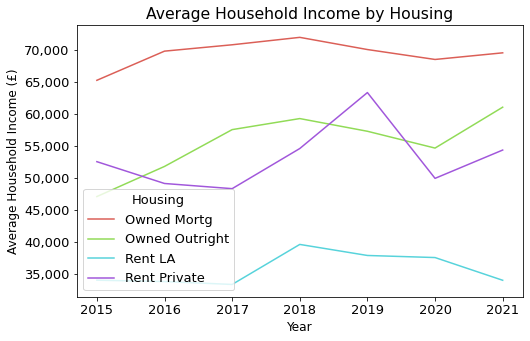

In [145]:
#preparing line plot
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_ylabel("Average Household Income (£)", fontsize = 12)
palette = sns.color_palette("hls", 4)
ax=sns.lineplot(data=df_merged2[(df_merged2.year>2014)][["qincomefreev2_calc","year","dhousing_mapped"]].groupby(["year","dhousing_mapped"]).mean(), x="year", y="qincomefreev2_calc",hue="dhousing_mapped",palette=palette)
ax.set_xlabel("Year", fontsize = 12)
ax.set_ylabel("Average Household Income (£)", fontsize = 12)
ylabels = ['{:,.0f}'.format(x) for x in ax.get_yticks()]
ax.set_yticklabels(ylabels)
plt.legend(title='Housing',loc='lower left')
plt.title("Average Household Income by Housing")
plt.show()


It can be said that people who lives on rent affected by the pandemic more.

Below, I plotted figures related to expectations of individuals about economy and monthly saving rate.

In [88]:
df_merged2["mq08_mapped"]=df_merged2["mq08"].map({
    1: 'Get a lot better',
    2: 'Get a little better',
    3: "Stay the same",
    4: "Get  a little worse",
    5: "Get  a lot worse",
    6: "Don't know / Prefer not to state",
    7: "Don't know / Prefer not to state"})

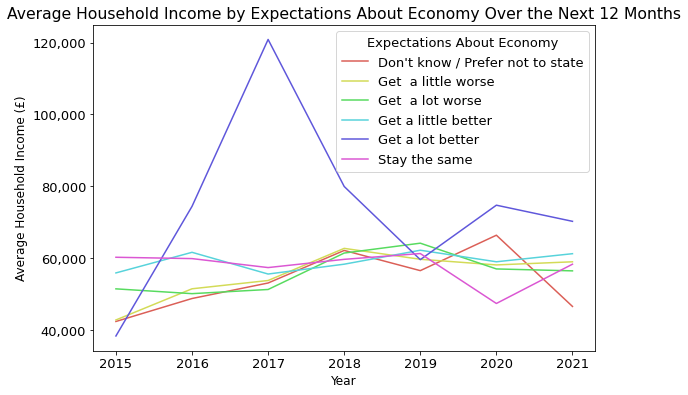

In [153]:
fig, ax = plt.subplots(figsize=(9, 6))
ax.set_ylabel("Average Household Income (£)", fontsize = 12)
palette = sns.color_palette("hls", 6)
ax=sns.lineplot(data=df_merged2[(df_merged2.year>2014)][["qincomefreev2_calc","year","mq08_mapped"]].groupby(["year","mq08_mapped"]).mean(), x="year", y="qincomefreev2_calc",hue="mq08_mapped",palette=palette)
ax.set_xlabel("Year", fontsize = 12)
ax.set_ylabel("Average Household Income (£)", fontsize = 12)
ylabels = ['{:,.0f}'.format(x) for x in ax.get_yticks()]
ax.set_yticklabels(ylabels)
plt.legend(title='Expectations About Economy',loc='upper right')
plt.title("Average Household Income by Expectations About Economy Over the Next 12 Months")
plt.show()


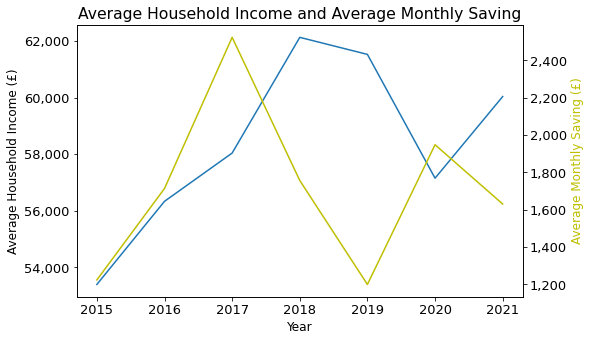

In [151]:
fig, ax = plt.subplots(figsize=(8, 5))

palette = sns.color_palette("hls", 4)
ax=sns.lineplot(data=df_merged2[df_merged2.year>2014][["qincomefreev2_calc","year","be2afree_1"]].groupby(["year"]).mean(), x="year", y="qincomefreev2_calc",palette=palette)
ax.set_ylabel("Average Household Income (£)", fontsize = 12)
ax.set_xlabel("Year", fontsize = 12)
ylabels = ['{:,.0f}'.format(x) for x in ax.get_yticks()]
ax.set_yticklabels(ylabels)
ax2 = ax.twinx()
ax1=sns.lineplot(data=df_merged2[df_merged2.year>2014][["qincomefreev2_calc","year","be2afree_1"]].groupby(["year"]).mean(),ax=ax2, x="year", y="be2afree_1",color='y')
ax1.set_ylabel("Average Monthly Saving (£)", fontsize = 12,color='y')
ylabels = ['{:,.0f}'.format(x) for x in ax1.get_yticks()]
ax1.set_yticklabels(ylabels)
plt.title("Average Household Income and Average Monthly Saving")
plt.show()


Looking at other variables to see whether there are any interesting relationships/development.

In [70]:
df_merged2["be13_mapped"]=df_merged2["be13"].map({
    1: 'Yes',
    2: 'No',
    97: "Don't know / Prefer not to state",
    98: "Don't know / Prefer not to state"})

In [71]:
df_merged2["boe55_mapped"]=df_merged2["boe55"].map({
    1: 'Not a problem',
    2: 'Quite difficult',
    3: "Extremely difficult",
    4: "Virtually impossible",
    5: "Don't know / Prefer not to state",
    6: "Don't know / Prefer not to state"})

In [72]:
data=df_merged2[(df_merged2.year>2014)][["qincomefreev2_calc","year","boe55_mapped"]].groupby(["year","boe55_mapped"]).mean().reset_index()
data.head()

,year,boe55_mapped,qincomefreev2_calc
0,2015,Don't know / Prefer not to state,NaN
1,2015,Extremely difficult,47831.519231
2,2015,Not a problem,53444.989474
3,2015,Quite difficult,54994.735931
4,2015,Virtually impossible,48937.526316


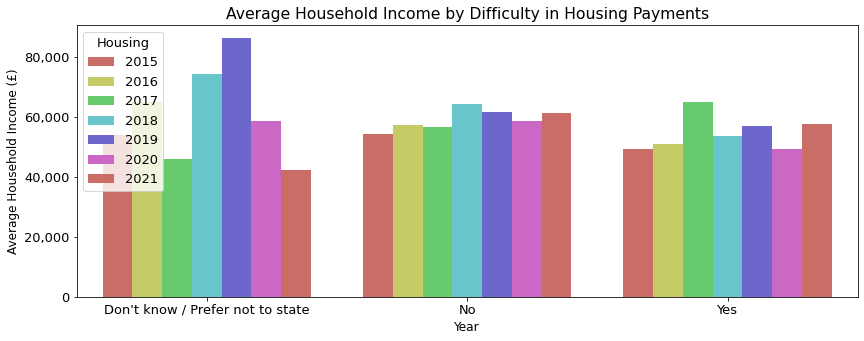

In [113]:
data=df_merged2[(df_merged2.year>2014)][["qincomefreev2_calc","year","be13_mapped"]].groupby(["year","be13_mapped"]).mean().reset_index()

fig, ax = plt.subplots(figsize=(14, 5))

ax=sns.barplot(data=data, x="be13_mapped", y="qincomefreev2_calc",hue="year",palette=palette)
ax.set_xlabel("Year", fontsize = 12)
ax.set_ylabel("Average Household Income (£)", fontsize = 12)
ylabels = ['{:,.0f}'.format(x) for x in ax.get_yticks()]
ax.set_yticklabels(ylabels)
plt.legend(title='Housing',loc='upper left')
plt.title("Average Household Income by Difficulty in Housing Payments")
plt.show()
